In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
dataroot = Path("./assets/preprocessed")
train_path = dataroot / "Train_nus-wide.ndjson"
test_path = dataroot / "Test_nus-wide.ndjson"

In [3]:
test = pl.read_ndjson(test_path)
train = pl.read_ndjson(train_path)

test = set(test["file_name"])
train = set(train["file_name"])
test.intersection(train)

set()

In [4]:
test = pl.read_ndjson(test_path)
tsample = test
#tsample = tsample.filter(pl.col("labels").list.len() > 3)
tsample = tsample.sample(4, seed=121)
tsample.glimpse()

Rows: 4
Columns: 4
$ file_name        <str> '0340_800221726.jpg', '0495_720172646.jpg', '0416_60045113.jpg', '0230_712236489.jpg'
$ labels     <list[str]> ['person', 'sky'], ['animal', 'flags'], ['sky', 'temple'], ['person']
$ tags       <list[str]> ['blue', 'beach', 'sun', 'building', 'sunglasses', 'july', 'giant'], ['america', 'flag'], ['art', 'travel', 'face', 'smile', 'temple', 'culture', 'buddha'], ['white', 'people', 'photography', 'window', 'men', 'office', 'portraits', 'room', 'adults', 'gray', 'males', 'furniture', 'mac', 'clothing']
$ image_root       <str> './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images'



In [5]:
#from scripts.test.compose import trainer, model, data
#os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])
#
#alignment = {"verticalalignment": "center", "horizontalalignment": "center"}
#
#preds = trainer.predict(model, datamodule=data)
#fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(5.5, 3.5), layout="constrained")
#for ax in axs.ravel():
#    ax.set_axis_off()
#for i, txt in enumerate(["Image", "Truth", "Top 5 pred", "Model pred"]):
#    axs[i,0].text(0, 0.5, txt, **alignment)
#for i, path in enumerate(tsample["file_name"]):
#    img_path = Path(tsample["image_root"][i], path)
#    img = plt.imread(img_path)
#    axs[0,i+1].imshow(img)
#    axs[1,i+1].text(0.5, 0.5, "\n".join(tsample["labels"][i]), **alignment)
#    axs[2,i+1].text(0.5, 0.5, "\n".join(tsample["tags"][i][:5]), **alignment)
#    axs[3,i+1].text(0.5, 0.5, "\n".join(preds[0][i] if len(preds[0][i]) > 0 else ["-"]), **alignment)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_test_batches=1.0)` was configured so 100% of the batches will be used..
/home/rinkuro/Sandbox/wallpaper_app/wallpaper_tagging/.venv/lib/python3.11/site-packages/lightning/fabric/loggers/csv_logs.py:268: Experiment logs directory assets/trained_models/compose.test/logs/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


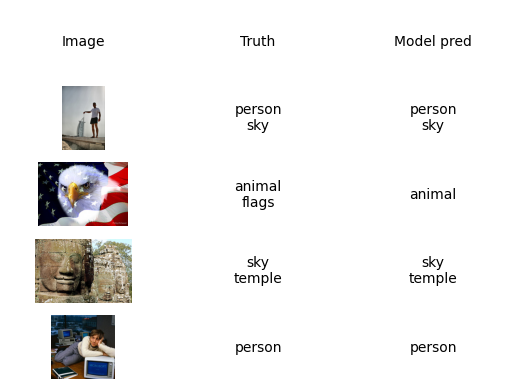

In [6]:
from scripts.test.compose import trainer, model, data
os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])

alignment = {"verticalalignment": "center", "horizontalalignment": "center"}

preds = trainer.predict(model, datamodule=data)
fig, axs = plt.subplots(ncols=3, nrows=5)
for ax in axs.ravel():
    ax.set_axis_off()
for i, txt in enumerate(["Image", "Truth", "Model pred"]):
    axs[0,i].text(0.5, 0.5, txt, **alignment)
for i, path in enumerate(tsample["file_name"]):
    img_path = Path(tsample["image_root"][i], path)
    img = plt.imread(img_path)
    axs[i+1,0].imshow(img)
    axs[i+1,1].text(0.5, 0.5, "\n".join(tsample["labels"][i]), **alignment)
    axs[i+1,2].text(0.5, 0.5, "\n".join(preds[0][i] if len(preds[0][i]) > 0 else ["-"]), **alignment)